# Linear regression on panel-wise sums

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
import src.operate_datasets    as operate_datasets
import src.model_visualisation as model_visualisation
import src.model_evaluation    as model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'longitudal')

X_train, y_train, X_test, y_test = operate_datasets.split_dataset(full_X, full_y)

In [4]:
min_clip = 0
#X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

In [5]:
X_train.shape

(108000, 13)

## Fit regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [7]:
model = LinearRegression().fit(X_train, y_train) # positive=True ?
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = model.score(X_train, y_train)

print('L2: ', score_l2)

y_pred = model.predict(X_train)

L2:  0.2794619064669571


## Visualise results

In [8]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [9]:
print('y = kx + b')
print('k', model.coef_)
print('b', model.intercept_)

y = kx + b
k [ 2.37453900e-05  2.66520601e-05  1.87849840e-05  1.46676572e-05
  2.95726879e-06 -1.04996635e-02 -3.98615743e-04  3.20540948e-03
  7.58673324e-03  1.58561342e-02  1.04686900e-04  1.90868126e-04
  3.38656328e-03]
b 0.1405031083691048


In [10]:
model_name = 'L2 on plane sums'
save_file_prefix = model_name.replace(' ', '-')

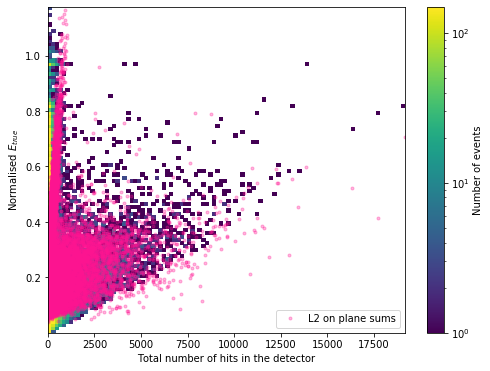

In [11]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred, model_name,
                                        save_file_prefix=save_file_prefix) 

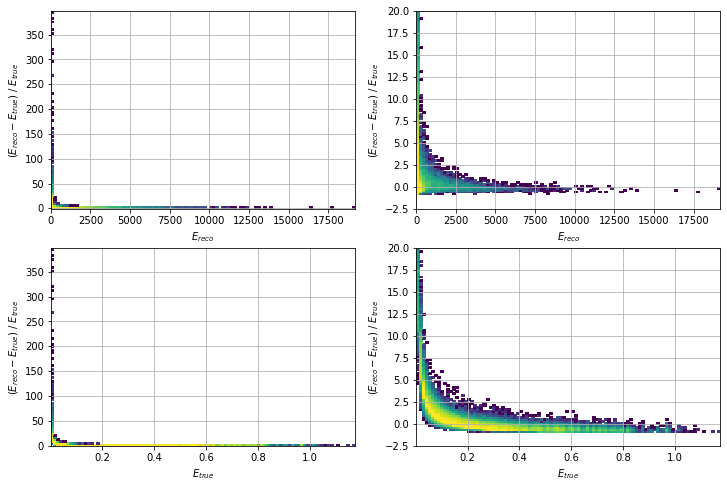

In [12]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred, vmax=450,
                                       save_file_prefix=save_file_prefix) 

mean   = 1.49858e+00
std    = 5.83337e+00
median = 2.90495e-01


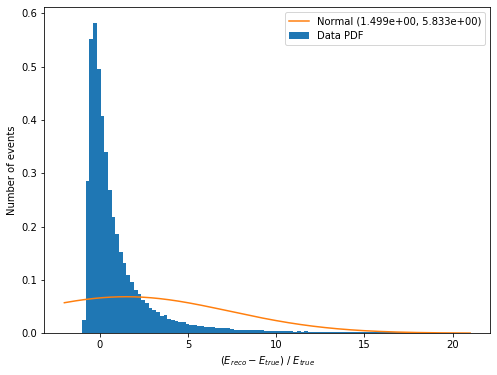

In [13]:
model_visualisation.plot_res_hist_fit(y_train, y_pred, (-1, 20),
                                      save_file_prefix=save_file_prefix)

In [14]:
model_evaluation.save_scores(y_train, y_pred, save_file_prefix)

explained_variance_score 0.279461906466957
max_error 1.0357048646911893
mean_absolute_error 0.1131076661164705
mean_squared_error 0.023051993246449975
median_absolute_error 0.09254816845253719
r2_score 0.2794619064669571


,L2-on-plane-sums
explained_variance_score,0.279462
max_error,1.035705
mean_absolute_error,0.113108
mean_squared_error,0.023052
median_absolute_error,0.092548
r2_score,0.279462
avg_resolution,1.498581
std_resolution,5.833365


## Validation

In [15]:
X_sum_test = X_test.sum(axis=1).reshape(-1,1)
y_test = y_test.reshape(-1,1)

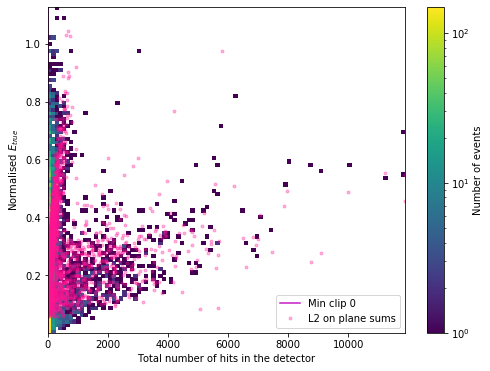

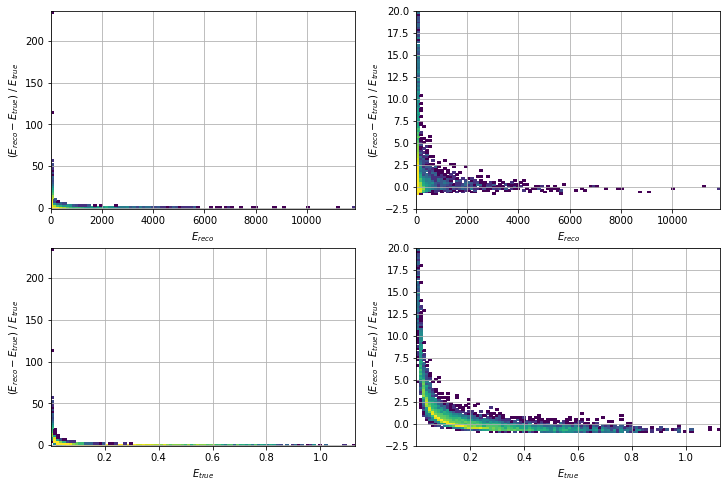

mean   = 1.40617e+00
std    = 4.39625e+00
median = 2.89234e-01


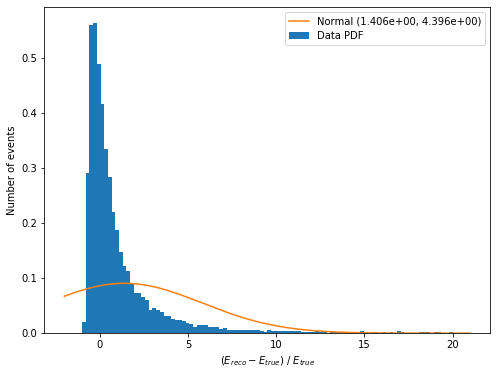

explained_variance_score 0.2776644600972348
max_error 0.8568993833042311
mean_absolute_error 0.11332374312398534
mean_squared_error 0.02303701464918681
median_absolute_error 0.0924587505732444
r2_score 0.2776638761818382


,L2-on-plane-sums
explained_variance_score,0.277664
max_error,0.856899
mean_absolute_error,0.113324
mean_squared_error,0.023037
median_absolute_error,0.092459
r2_score,0.277664
avg_resolution,1.406165
std_resolution,4.396246


In [16]:
y_pred_test = model.predict(X_test)


model_visualisation.plot_2d_energy_hist_clip(X_sum_test, y_test, y_pred_test, min_clip, model_name,
                                             save_file_prefix=save_file_prefix) 

model_visualisation.plot_res_vs_energy(X_sum_test, y_test, y_pred_test, vmax=150,
                                       save_file_prefix=save_file_prefix)  

model_visualisation.plot_res_hist_fit(y_test, y_pred_test, [-1,20],
                                      save_file_prefix=save_file_prefix)

model_evaluation.save_scores(y_test, y_pred_test, save_file_prefix, 
                             folder_path=model_evaluation.TEST_SCORES_DIR)